In [13]:
import pandas as pd 
import numpy as np 
import requests
from bs4 import BeautifulSoup

# read in first dataset (oscars list)
oscars = pd.read_csv("the_oscar_award.csv")
oscars['category'].value_counts().shape
oscars = oscars.drop(['year_film','year_ceremony'], axis=1)
oscars.head(15)

,ceremony,category,name,film,winner
0,1,ACTOR,Richard Barthelmess,The Noose,False
1,1,ACTOR,Emil Jannings,The Last Command,True
2,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1,ART DIRECTION,Rochus Gliese,Sunrise,False
6,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
7,1,ART DIRECTION,Harry Oliver,7th Heaven,False
8,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,False
9,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True


In [14]:
# filter out all data that isn't best picture / best motion picture
oscars['category'] = oscars['category'].str.lower()
bp = oscars[(oscars['category'] == 'best picture') | (oscars['category'] == 'best motion picture')]
bp

,ceremony,category,name,film,winner
1751,17,best motion picture,Paramount,Double Indemnity,False
1752,17,best motion picture,Metro-Goldwyn-Mayer,Gaslight,False
1753,17,best motion picture,Paramount,Going My Way,True
1754,17,best motion picture,Selznick International Pictures,Since You Went Away,False
1755,17,best motion picture,20th Century-Fox,Wilson,False
...,...,...,...,...,...
10719,95,best picture,"Kristie Macosko Krieger, Steven Spielberg and ...",The Fabelmans,NaN
10720,95,best picture,"Todd Field, Alexandra Milchan and Scott Lamber...",Tár,NaN
10721,95,best picture,"Tom Cruise, Christopher McQuarrie, David Ellis...",Top Gun: Maverick,NaN
10722,95,best picture,"Erik Hemmendorff and Philippe Bober, Producers",Triangle of Sadness,NaN


In [15]:
# web scrape rotten tomatoes data
url_list = ['https://editorial.rottentomatoes.com/guide/oscars-2023-best-picture-nominees/',
            'https://editorial.rottentomatoes.com/guide/2022-best-picture-nominees/', 
            'https://editorial.rottentomatoes.com/guide/2021-best-picture-nominees-ranked-by-tomatometer/',
            'https://editorial.rottentomatoes.com/guide/oscars-2020-best-picture-nominees-ranked-by-tomatometer/',
            'https://editorial.rottentomatoes.com/article/oscars-2019-best-picture-nominees/',
            'https://editorial.rottentomatoes.com/article/all-2018-oscar-best-picture-nominees-by-tomatometer/',
            'https://editorial.rottentomatoes.com/guide/oscars-2017-best-picture-nominees-tomatometer-scores/',
            'https://editorial.rottentomatoes.com/guide/oscars-best-picture-nominees-ranked-by-tomatometer/',
            'https://editorial.rottentomatoes.com/article/2015-oscar-nominations/',
            'https://editorial.rottentomatoes.com/article/total-recall-the-2014-best-picture-nominees/',
            'https://editorial.rottentomatoes.com/article/2013-academy-awards-nominations/',
            'https://editorial.rottentomatoes.com/guide/lowest-rated-best-picture-nominees-of-all-time/',
            "https://editorial.rottentomatoes.com/guide/movies-100-percent-score-rotten-tomatoes/", 
            "https://editorial.rottentomatoes.com/guide/oscars-best-and-worst-best-pictures/",
            "https://editorial.rottentomatoes.com/guide/best-cinematography-winners-ranked/",
            "https://editorial.rottentomatoes.com/guide/golden-globes-best-film-winners-by-tomatometer/"
            ]

In [16]:
toms = pd.DataFrame(columns=['Title', 'Tomato Score', 'Year', 'Critic Review'])

for url in url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    movies = soup.find_all('div', {'class': 'countdown-item-content'})
    for movie in movies:
        title = movie.find('a').text
        tomato_score = movie.find('span', {'class': 'tMeterScore'}).text
        year = movie.find('span', {'class': 'subtle start-year'}).text
        critic_review = movie.find('div', {'class': 'info critics-consensus'}).text.strip()
        toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)

print(toms)
toms.shape
toms.head(50)

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

                                 Title Tomato Score    Year  \
0                    Top Gun: Maverick          96%  (2022)   
1            The Banshees of Inisherin          96%  (2022)   
2    Everything Everywhere All at Once          94%  (2022)   
3                        The Fabelmans          92%  (2022)   
4                                  Tár          91%  (2022)   
..                                 ...          ...     ...   
567                       The Cardinal          50%  (1963)   
568         The Greatest Show on Earth          49%  (1952)   
569                           The Robe          38%  (1953)   
570          Anne of the Thousand Days          38%  (1969)   
571                     A Star Is Born          37%  (1976)   

                                         Critic Review  
0    Critics Consensus: Top Gun: Maverick pulls off...  
1    Critics Consensus: Featuring some of Martin Mc...  
2    Critics Consensus: Led by an outstanding Miche...  
3    Critics Co

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'Critic Review': critic_review}, ignore_index=True)
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/2136281532.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toms = toms.append({'Title': title, 'Tomato Score': tomato_score, 'Year': year, 'C

,Title,Tomato Score,Year,Critic Review
0,Top Gun: Maverick,96%,(2022),Critics Consensus: Top Gun: Maverick pulls off...
1,The Banshees of Inisherin,96%,(2022),Critics Consensus: Featuring some of Martin Mc...
2,Everything Everywhere All at Once,94%,(2022),Critics Consensus: Led by an outstanding Miche...
3,The Fabelmans,92%,(2022),"Critics Consensus: Part memoir, part ode to th..."
4,Tár,91%,(2022),Critics Consensus: Led by the soaring melody o...
5,All Quiet on the Western Front,89%,(2022),"Critics Consensus: Both timely and timeless, A..."
6,Elvis,77%,(2022),Critics Consensus: The standard rock biopic fo...
7,Avatar: The Way of Water,76%,(2022),"Critics Consensus: Narratively, it might be fa..."
8,Drive My Car,97%,(2021),Critics Consensus: Drive My Car's imposing run...
9,CODA,94%,(2021),Critics Consensus: CODA's story offers few sur...


In [17]:
# remove duplicate values
tomats = toms.drop_duplicates()
tomats.shape

# take parentheses off of the year and remove 'Critics Consensus: '
tomats['Year'] = tomats['Year'].str.replace('(', '').str.replace(')', '')
tomats['Critic Review'] = tomats['Critic Review'].str.replace('Critics Consensus: ', '')

/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/3211691404.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tomats['Year'] = tomats['Year'].str.replace('(', '').str.replace(')', '')
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/3211691404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomats['Year'] = tomats['Year'].str.replace('(', '').str.replace(')', '')
/var/folders/ff/zs0vpdcx0ql6mmm2bqgq56280000gn/T/ipykernel_35493/3211691404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [18]:
# check to see if we have movies with the same titles
tomats['Title'].value_counts()

# 1st - Mutiny on the Bounty
tomats[tomats['Title'] == 'Mutiny on the Bounty']
bp[bp['film'] == 'Mutiny on the Bounty'] # it's only been a nominee once (1962/70% version)
# remove the other version:
tomats = tomats[~((tomats['Title'] == 'Mutiny on the Bounty') & (tomats['Tomato Score'] == '96%'))]

# 2nd - All Quiet
tomats[tomats['Title'] == 'All Quiet on the Western Front']
bp[bp['film'] == 'All Quiet on the Western Front'] # it's only been a nominee once (2022/90% version)
# remove the other version:
tomats = tomats[~((tomats['Title'] == 'All Quiet on the Western Front') & (tomats['Tomato Score'] == '98%'))]

# 3rd - Cleopatra
tomats[tomats['Title'] == 'Cleopatra']
bp[bp['film'] == 'Cleopatra'] # it's only been a nominee once (1963/56% version)
# remove the other version:
tomats = tomats[~((tomats['Title'] == 'Cleopatra') & (tomats['Tomato Score'] == '82%'))]

# 4th - A Star Is Born
tomats[tomats['Title'] == 'A Star Is Born']
bp[bp['film'] == 'A Star Is Born'] # the wrong one is in the tomats
# remove one of them:
tomats = tomats[~((tomats['Title'] == 'A Star Is Born') & (tomats['Tomato Score'] == '35%'))]
# change the 100% version to 90%
tomats.loc[tomats['Title'] == 'A Star Is Born', 'Tomato Score'] = '90%'
tomats = tomats[~((tomats['Title'] == 'A Star Is Born') & (tomats['Year'] == '1937'))]

# 5th - West Side Story
tomats[tomats['Title'] == 'West Side Story']
bp[bp['film'] == 'West Side Story'] 
# remove one of them:
tomats = tomats[~((tomats['Title'] == 'West Side Story') & (tomats['Tomato Score'] == '92%'))]

##### no more duplicate titles
print(tomats['Title'].value_counts())

Top Gun: Maverick     1
Gravity               1
A Farewell to Arms    1
Cries and Whispers    1
Shanghai Express      1
                     ..
Shadow of a Doubt     1
Cool Hand Luke        1
Coded Bias            1
Chained for Life      1
A Star Is Born        1
Name: Title, Length: 439, dtype: int64


In [19]:
# change 'Title' to 'film'
tomats['film'] = tomats['Title']
tomats = tomats.drop('Title', axis=1)

# merge oscars with the tomatoes scores
df_m = pd.merge(bp, tomats, how='inner', on=['film'])

In [20]:
# 2023 oscars winner column has not been populated
# fill all NAs with False
df_m['winner'] = df_m['winner'].fillna(False)

# set Everything Everywhere to True
df_m.loc[df_m['film'] == 'Everything Everywhere All at Once', 'winner'] = True

# 237 rows & 8 columns
df_m.shape
df_m = df_m.drop('category', axis=1)

In [22]:
# make variable nom count
nom_count = oscars.groupby(['film'])['film'].count().reset_index(name='nomination count')

In [23]:
# merge with number of nominations
nom_count
df = pd.merge(df_m, nom_count, how='inner', on=['film'])

In [144]:
df['Year'] = df['Year'].astype('int')

In [30]:
df['Tomato Score'] = pd.to_numeric(df['Tomato Score'].str.rstrip('%')) / 100

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

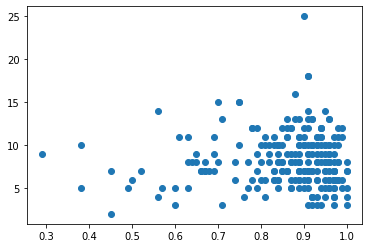

In [72]:
plt.scatter(df['Tomato Score'], df['nomination count']);

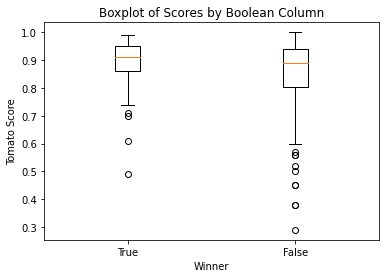

In [35]:
# plt.boxplot(df['winner'], df['Tomato Score']);
# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot([df[df['winner']]['Tomato Score'], df[~df['winner']]['Tomato Score']])

# Set the x-tick labels
ax.set_xticklabels(['True', 'False'])

# Add axis labels and title
ax.set_xlabel('Winner')
ax.set_ylabel('Tomato Score')
ax.set_title('Boxplot of Scores by Boolean Column')

# Display the plot
plt.show()


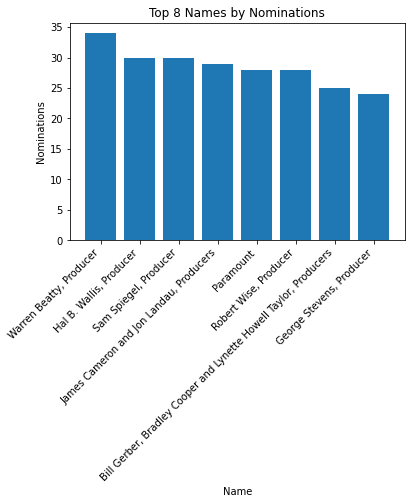

In [39]:
# Select the top 8 names by nominations
top_names = df.groupby('name')['nomination count'].sum().nlargest(8).reset_index()

# Create a bar chart
plt.bar(top_names['name'], top_names['nomination count'])

# Set the axis labels and title
plt.xlabel('Name')
plt.ylabel('Nominations')
plt.title('Top 8 Names by Nominations')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

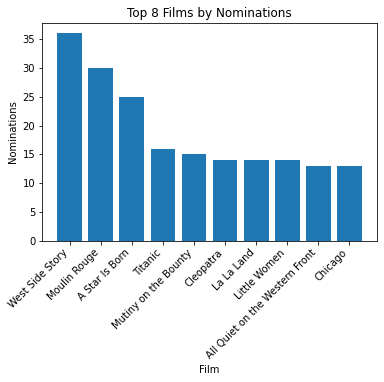

In [43]:
# Select the top 8 films by nominations
top_films = df.groupby('film')['nomination count'].sum().nlargest(10).reset_index()

# Create a bar chart
plt.bar(top_films['film'], top_films['nomination count'])

# Set the axis labels and title
plt.xlabel('Film')
plt.ylabel('Nominations')
plt.title('Top 8 Films by Nominations')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

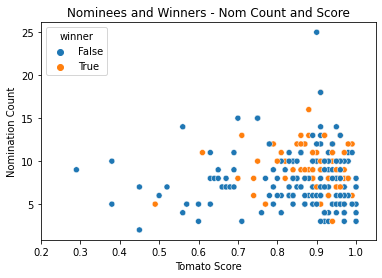

In [210]:
sns.scatterplot(data=df, x='Tomato Score', y='nomination count', hue='winner')

# set x-axis limits and label
plt.xlim(0.2, 1.05)
plt.xlabel('Tomato Score')

# set y-axis label
plt.ylabel('Nomination Count')
plt.title('Nominees and Winners - Nom Count and Score')
    
# show the plot
plt.show()

In [212]:
# df[(df['winner']==True) & (df['Tomato Score']<0.8)]
# df[(df['winner']==True) & (df['nomination count'] < 4)]
# df[df['Year'] >= 2000]

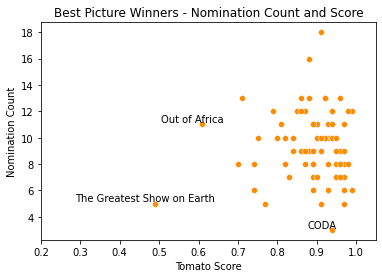

In [208]:
low_score_df = df[((df['winner']==True) & (df['Tomato Score'] < 0.7)) | ((df['winner']==True) & (df['nomination count'] < 4))]

sns.scatterplot(data=df[df['winner']==True], x='Tomato Score', y='nomination count', color='darkorange')

# set x-axis limits and label
plt.xlim(0.2, 1.05)
plt.xlabel('Tomato Score')

# set y-axis label
plt.ylabel('Nomination Count')

for index, row in low_score_df.iterrows():
    plt.annotate(row['film'], xy=(row['Tomato Score'], row['nomination count']), xytext=(-10, 10), textcoords='offset points', ha='center', va='top')

plt.title("Best Picture Winners - Nomination Count and Score")
# show the plot
plt.show()

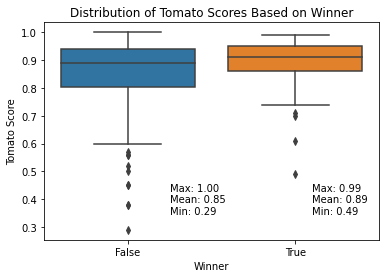

In [207]:
sns.boxplot(data=df, x='winner', y='Tomato Score')

# calculate statistics for each group
grouped = df.groupby('winner')['Tomato Score']
means = grouped.mean().values
mins = grouped.min().values
maxes = grouped.max().values

# add x-axis and y-axis labels
plt.xlabel('Winner')
plt.ylabel('Tomato Score')

# add data labels for each group
#plt.subplot(1,2,1)
plt.text(0.25, 0.4, f"Max: {maxes[0]:.2f}\nMean: {means[0]:.2f}\nMin: {mins[0]:.2f}", ha='left', va='center', fontdict={'fontsize': 10, 'color': 'black'})
#plt.subplot(1,2,2)
plt.text(1.1, 0.4, f"Max: {maxes[1]:.2f}\nMean: {means[1]:.2f}\nMin: {mins[1]:.2f}", ha='left', va='center', fontdict={'fontsize': 10, 'color': 'black'})
plt.title("Distribution of Tomato Scores Based on Winner")

# show the plot again with the data labels
plt.show()


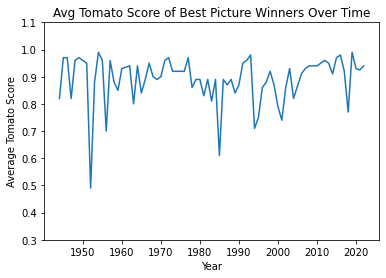

In [188]:
winners = df[df['winner']==True]

# group the data by Year and calculate the mean Tomato Score for each year
df_yearly_mean = winners.groupby('Year')['Tomato Score'].mean()

# plot the average Tomato Score over the years
plt.plot(df_yearly_mean.index, df_yearly_mean.values)

# set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Average Tomato Score')
plt.ylim(0.3, 1.1)
plt.title('Avg Tomato Score of Best Picture Winners Over Time')

# show the plot
plt.show()

In [151]:
df[df['winner']==True]

,ceremony,name,film,winner,Tomato Score,Year,Critic Review,nomination count
0,17,Paramount,Going My Way,True,0.82,1944,Bing Crosby and Barry Fitzgerald are eminently...,10
3,18,Paramount,The Lost Weekend,True,0.97,1945,Director Billy Wilder's unflinchingly honest l...,7
4,19,Samuel Goldwyn Productions,The Best Years of Our Lives,True,0.97,1946,An engrossing look at the triumphs and travail...,8
6,20,20th Century-Fox,Gentleman's Agreement,True,0.82,1947,It occasionally fails to live up to its subjec...,8
8,21,J. Arthur Rank-Two Cities Films,Hamlet,True,0.96,1948,A well-executed labor of love from star and di...,13
...,...,...,...,...,...,...,...,...
201,91,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True,0.77,2018,Green Book takes audiences on an excessively s...,5
212,92,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True,0.99,2019,"An urgent, brilliantly layered look at timely ...",6
217,93,"Frances McDormand, Peter Spears, Mollye Asher,...",Nomadland,True,0.93,2020,A poetic character study on the forgotten and ...,6
222,94,"Philippe Rousselet, Fabrice Gianfermi and Patr...",CODA,True,0.94,2021,"CODA's story offers few surprises, but strong ...",3


In [199]:
df.head(15)

,ceremony,name,film,winner,Tomato Score,Year,Critic Review,nomination count
0,17,Paramount,Going My Way,True,0.82,1944,Bing Crosby and Barry Fitzgerald are eminently...,10
1,17,20th Century-Fox,Wilson,False,0.89,1944,No consensus yet.,10
2,18,Metro-Goldwyn-Mayer,Anchors Aweigh,False,0.57,1945,No consensus yet.,5
3,18,Paramount,The Lost Weekend,True,0.97,1945,Director Billy Wilder's unflinchingly honest l...,7
4,19,Samuel Goldwyn Productions,The Best Years of Our Lives,True,0.97,1946,An engrossing look at the triumphs and travail...,8
5,19,Metro-Goldwyn-Mayer,The Yearling,False,1.00,1946,No consensus yet.,7
6,20,20th Century-Fox,Gentleman's Agreement,True,0.82,1947,It occasionally fails to live up to its subjec...,8
7,20,J. Arthur Rank-Cineguild,Great Expectations,False,1.00,1946,Furnished with striking visual detail and told...,5
8,21,J. Arthur Rank-Two Cities Films,Hamlet,True,0.96,1948,A well-executed labor of love from star and di...,13
9,21,Warner Bros.,Johnny Belinda,False,0.91,1948,No consensus yet.,12


In [155]:
df[df['Tomato Score']==1.00]

,ceremony,name,film,winner,Tomato Score,Year,Critic Review,nomination count
5,19,Metro-Goldwyn-Mayer,The Yearling,False,1.0,1946,No consensus yet.,7
7,20,J. Arthur Rank-Cineguild,Great Expectations,False,1.0,1946,Furnished with striking visual detail and told...,5
10,21,Warner Bros.,The Treasure of the Sierra Madre,False,1.0,1948,"Remade but never duplicated, this darkly humor...",4
33,30,"Henry Fonda and Reginald Rose, Producers",12 Angry Men,False,1.0,1957,Sidney Lumet's feature debut is a superbly wri...,3
37,32,"Otto Preminger, Producer",Anatomy of a Murder,False,1.0,1959,"One of cinema's greatest courtroom dramas, Ana...",7
76,44,"Stephen J. Friedman, Producer",The Last Picture Show,False,1.0,1971,Making excellent use of its period and setting...,8


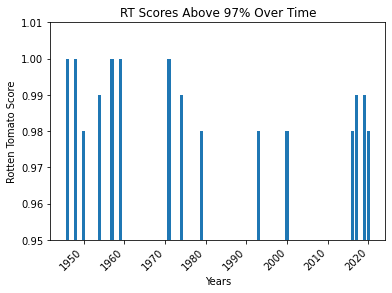

In [205]:
# do films that got 100% and if they won the best picture or not
# Select the top 8 films by nominations
top_films = df[df['Tomato Score'] >= 0.98]

# Create a bar chart
plt.bar(top_films['Year'], top_films['Tomato Score'])

# Set the axis labels and title
plt.xlabel('Years')
plt.ylabel('Rotten Tomato Score')
plt.title('RT Scores Above 97% Over Time')
plt.xticks(rotation=45, ha='right')
# plt.xlim(1937, 2020)
plt.ylim(0.95, 1.01)

# Display the plot
plt.show()

In [211]:
df[df['Tomato Score'] >= 0.98]

,ceremony,name,film,winner,Tomato Score,Year,Critic Review,nomination count
5,19,Metro-Goldwyn-Mayer,The Yearling,False,1.00,1946,No consensus yet.,7
7,20,J. Arthur Rank-Cineguild,Great Expectations,False,1.00,1946,Furnished with striking visual detail and told...,5
10,21,Warner Bros.,The Treasure of the Sierra Madre,False,1.00,1948,"Remade but never duplicated, this darkly humor...",4
14,23,Paramount,Sunset Blvd.,False,0.98,1950,"Arguably the greatest movie about Hollywood, B...",11
24,27,"Sam Spiegel, Producer",On the Waterfront,True,0.99,1954,With his electrifying performance in Elia Kaza...,12
33,30,"Henry Fonda and Reginald Rose, Producers",12 Angry Men,False,1.00,1957,Sidney Lumet's feature debut is a superbly wri...,3
37,32,"Otto Preminger, Producer",Anatomy of a Murder,False,1.00,1959,"One of cinema's greatest courtroom dramas, Ana...",7
76,44,"Stephen J. Friedman, Producer",The Last Picture Show,False,1.00,1971,Making excellent use of its period and setting...,8
83,47,"Robert Evans, Producer",Chinatown,False,0.99,1974,As bruised and cynical as the decade that prod...,11
94,52,"Francis Coppola, Producer; Fred Roos, Gray Fr...",Apocalypse Now,False,0.98,1979,"Francis Ford Coppola's haunting, hallucinatory...",8
